In [ ]:
# importing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
FILEPATHS = { # For october only
    'comissionados_nao_quadro':'comissionados_nao_quadro_out.xls',
    'comissionados_quadro':'comissionados_quadro_out.xls',
    'folha_pgto':'folha_pgto_out.xls',
    'media_salario':'media_salario_out.xls',
    'servants': 'servidores_out.xls'
}
def get_filepath(key):
    return FILEPATHS[key]

In [3]:
# reading files
servidores = pd.read_excel('../data/{}'.format(get_filepath('servants'))).dropna()
comissionados_nao_quadro = pd.read_excel('../data/{}'.format(get_filepath('comissionados_nao_quadro'))).dropna()
comissionados_quadro = pd.read_excel('../data/{}'.format(get_filepath('comissionados_quadro'))).dropna()

In [4]:
comissionados_nao_quadro.shape

(196, 6)

In [5]:
comissionados_quadro.head()

,Secretaria,Departamento,Registro,Nome,Cargo Efetivo,Nível Efetivo,Nível Salarial,Cargo Atual
1,SEFIN,DEATRI,08.061-4,DINA ELIZABETH EVANGELISTA SANTOS,AUDITOR FISCAL DE TRIBUTOS MUNICIPAIS,R,R,COORDENADOR II
2,SMS,SMS,12.040-2,VALTER MAKOTO NAKAGAWA,MEDICO,S,S,SECRETARIO ADJUNTO
3,OTC,OTC,14.425-3,RIVALDO SANTOS DE ALMEIDA JUNIOR,TEC.DE ABASTECIMENTO,L,CS,OUVIDOR PUBLICO MUNICIPAL
4,SESEG,CORREGE-SESEG,15.068-0,RAIMUNDO DOS SANTOS FERREIRA,GUARDA MUNICIPAL IV-INSPETOR CHEFE,L,C-1,CHEFE DE DEPARTAMENTO
5,SESEG,DGM,15.193-6,FRANCISCO APARECIDO JERONIMO,GUARDA MUNICIPAL III-INSPETOR,J,J,COORDENADOR III


In [6]:
servidores['Tipo de Servidor'].unique()

array(['Estatutário', 'Cargo em Comissão não Pertencente ao Quadro',
       'Celetista'], dtype=object)

In [7]:
servidores.head()

,Nome do Servidor,Registro,Tipo de Servidor,Cargo Efetivo,Cargo,Carga Horária,Lotação,Admissão,Qtde.
1,ABDON FERREIRA DA SILVA NETO,32.642-1,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SEDUC - UME-NGF,20/05/2013,1
2,ABIGAIL DE ALMEIDA ELIAS,28.796-1,Estatutário,PROF. ADJUNTO I,PROF. ADJUNTO I,105.0,SEDUC - UME-PA,16/10/2009,1
3,ABNER DE SOUZA SANTANA,36.136-0,Estatutário,INSTRUTOR DE ED. MUSICAL,INSTRUTOR DE ED. MUSICAL,200.0,SECULT - COFORM-SECULT,24/04/2018,1
4,ABNER NUNES,31.636-4,Estatutário,OFICIAL DE ADMINISTRACAO,OFICIAL DE ADMINISTRACAO,200.0,SMS - SEUB-ACP,30/10/2012,1
5,ABRAAO COSME SAMPAIO,15.879-0,Estatutário,FISCAL DE TRANSITO,FISCAL DE TRANSITO,200.0,SEFIN - SEFIS-FEI,18/12/1987,1


In [8]:
servidores.columns

Index(['Nome do Servidor', 'Registro', 'Tipo de Servidor', 'Cargo Efetivo',
       'Cargo', 'Carga Horária', 'Lotação', 'Admissão', 'Qtde.'],
      dtype='object')

In [9]:
servidores['Tipo de Servidor'].value_counts()

Estatutário                                    11410
Cargo em Comissão não Pertencente ao Quadro      196
Celetista                                         98
Name: Tipo de Servidor, dtype: int64

In [10]:
nao_quadro_percentage = len(servidores[\
    servidores['Tipo de Servidor']=='Cargo em Comissão não Pertencente ao Quadro'])\
    /len(servidores)

In [11]:
print ('KPI1 : {:.2f}% of servants comissionados over all servantes'.format(100.*nao_quadro_percentage))

KPI1 : 1.67% of servants comissionados over all servantes


In [15]:
perc_comissionados = len(comissionados_quadro)/len(servidores)
print ('Numero de comissionados: {:.2f}%'.format(perc_comissionados*100))

Numero de comissionados: 0.94%


In [34]:
# Breakdown by dept
servidores['nao_quadro'] = servidores.apply(lambda x: 1 if x['Tipo de Servidor']=='Cargo em Comissão não Pertencente ao Quadro' else 0,axis=1)
grouped = servidores.groupby(['Lotação'],as_index=False).\
agg({'Registro':'count','nao_quadro':'sum'}).sort_values(by='Registro',ascending=False)

In [35]:
servidores.head()

,Nome do Servidor,Registro,Tipo de Servidor,Cargo Efetivo,Cargo,Carga Horária,Lotação,Admissão,Qtde.,nao_quadro
1,ABDON FERREIRA DA SILVA NETO,32.642-1,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SEDUC - UME-NGF,20/05/2013,1,0
2,ABIGAIL DE ALMEIDA ELIAS,28.796-1,Estatutário,PROF. ADJUNTO I,PROF. ADJUNTO I,105.0,SEDUC - UME-PA,16/10/2009,1,0
3,ABNER DE SOUZA SANTANA,36.136-0,Estatutário,INSTRUTOR DE ED. MUSICAL,INSTRUTOR DE ED. MUSICAL,200.0,SECULT - COFORM-SECULT,24/04/2018,1,0
4,ABNER NUNES,31.636-4,Estatutário,OFICIAL DE ADMINISTRACAO,OFICIAL DE ADMINISTRACAO,200.0,SMS - SEUB-ACP,30/10/2012,1,0
5,ABRAAO COSME SAMPAIO,15.879-0,Estatutário,FISCAL DE TRANSITO,FISCAL DE TRANSITO,200.0,SEFIN - SEFIS-FEI,18/12/1987,1,0


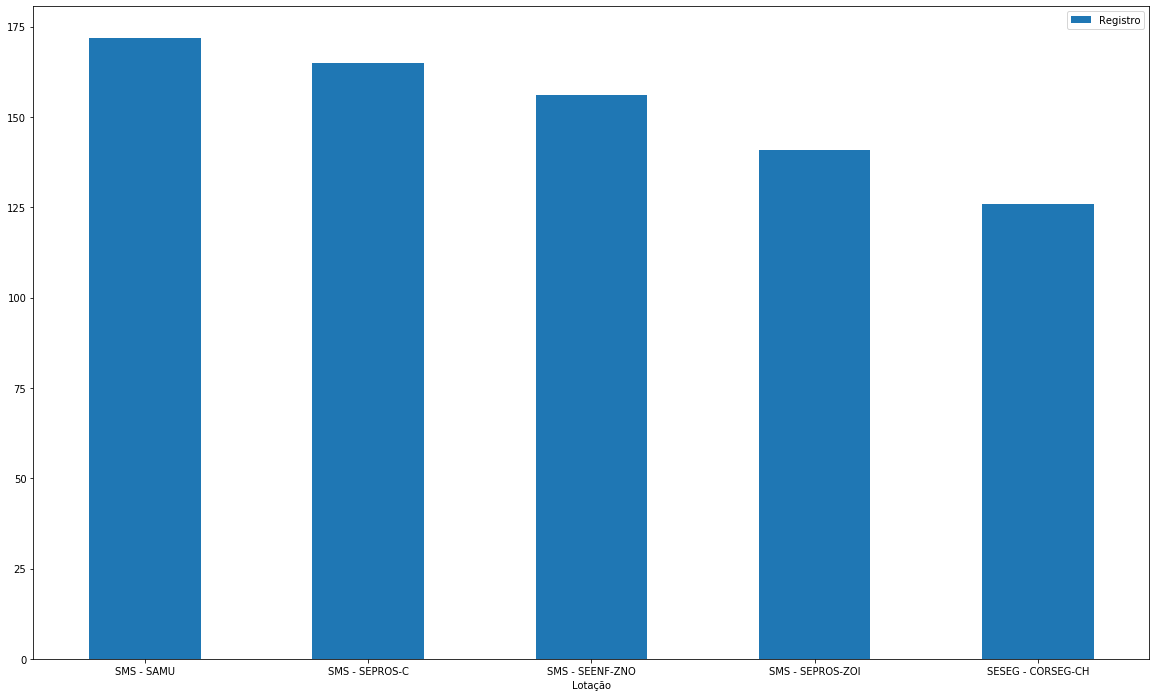

In [36]:
grouped[:5].plot.bar(x='Lotação', y='Registro', rot=0, figsize=(20,12))

In [42]:
grouped['perc'] = grouped['nao_quadro']/grouped['Registro']
grouped.sort_values('nao_quadro',ascending=False)

,Lotação,Registro,nao_quadro,perc
4,GPM - GPM,51,20,0.392157
468,SEGOV - GAB-SEGOV,35,11,0.314286
582,SESERP - GAB-SESERP,27,10,0.370370
85,SECULT - GAB-SECULT,20,7,0.350000
699,SMS - GAB-SMS,45,7,0.155556
...,...,...,...,...
107,SECULT - SEHE,5,0,0.000000
680,SMS - COMLIC-SMS,5,0,0.000000
763,SMS - SEUB-GON,45,0,0.000000
514,SEMAM - UNIBOT-ORQ,5,0,0.000000


### KPI 2 - Mayor

In [43]:
prefeito = servidores[servidores['Cargo Efetivo'].str.contains('PREFEITO MUNICIPAL')].iloc[0]['Nome do Servidor']

In [44]:
prefeito

'PAULO ALEXANDRE PEREIRA BARBOSA'

In [45]:
surnames_mayor = ['PEREIRA','BARBOSA']

In [46]:
# Comissionados fora quadro with same last name (any) as mayor
nao_quadro_same_surname = comissionados_nao_quadro[comissionados_nao_quadro.Nome.str.contains('|'.join(surnames_mayor))]
print (nao_quadro_same_surname.shape)
nao_quadro_same_surname.head()

(6, 6)


,Secretaria,Departamento,Registro,Nome,Cargo Efetivo,Nível Salarial
28,SECOM,SECOM,36.742-5,CAMILLA PEREIRA COSTA,ASSESSOR TECNICO III,C-3
73,SESERP,DESERP,34.475-4,FLAVIO ANIBAL PEREIRA MORGADO,COORDENADOR II,C-2
128,SECULT,DECITEC,35.051-2,MICHEL AUGUSTO PEREIRA,COORDENADOR III,C-3
140,GPM,GPM,34.954-8,PAULO ALEXANDRE PEREIRA BARBOSA,PREFEITO MUNICIPAL,PREF
168,SEGOV,SEGOV,31.849-3,ROGERIO PEREIRA DOS SANTOS,SECRETARIO MUNICIPAL,CS


In [47]:
print ('KPI 2: {0} servants with same last name as mayor - {1}'.format(len(nao_quadro_same_surname),
       str(surnames_mayor)))

KPI 2: 6 servants with same last name as mayor - ['PEREIRA', 'BARBOSA']


### KPI3 - same surname as secretary of his/her department

In [ ]:
secreatarios = servidores[servidores['Cargo'].str.contains('SECRETARIO MUNICIPAL')]

In [ ]:
secreatarios.head(20)

In [ ]:
servs_secretario = servidores.merge(secreatarios[['Lotação','Nome do Servidor']], on='Lotação')

In [ ]:
# removed own entries of secretary (secretaries also exist in df servants)
servs_secretario_clean = servs_secretario[~servs_secretario.Registro.isin(secreatarios.Registro.unique())]
servs_secretario_clean = servs_secretario_clean.rename(columns={'Nome do Servidor_y':'secretario'})
servs_secretario_clean = servs_secretario_clean.rename(columns={'Nome do Servidor_x':'servidor'})

In [ ]:
def extract_surnames(surname):
    forbidden_last_names = ['DA','DE','DOS']
    return [i for i in str(surname).split(' ')[1:] if i not in forbidden_last_names]
    

suspected_servents_secretary = servs_secretario_clean[servs_secretario_clean.\
                       apply(lambda x: any(name in x['servidor'] for name in extract_surnames(x['secretario'])),\
                             axis=1)]

In [21]:
suspected_servents_secretary['Lotação'].value_counts()

NameError: name 'suspected_servents_secretary' is not defined

In [ ]:
print ('KPI3 : {} suspect servants with same name as secretary'.format(len(suspected_servents_secretary)))
suspected_servents_secretary.head(20)

## Finding bumping by comission

In [20]:
comissionados_quadro[comissionados_quadro['Nome']=='PAULA DE MOURA VILLACA PAIXAO'].head()

,Secretaria,Departamento,Registro,Nome,Cargo Efetivo,Nível Efetivo,Nível Salarial,Cargo Atual


In [50]:
comissionados_quadro.head()

,Secretaria,Departamento,Registro,Nome,Cargo Efetivo,Nível Efetivo,Nível Salarial,Cargo Atual
1,SEFIN,DEATRI,08.061-4,DINA ELIZABETH EVANGELISTA SANTOS,AUDITOR FISCAL DE TRIBUTOS MUNICIPAIS,R,R,COORDENADOR II
2,SMS,SMS,12.040-2,VALTER MAKOTO NAKAGAWA,MEDICO,S,S,SECRETARIO ADJUNTO
3,OTC,OTC,14.425-3,RIVALDO SANTOS DE ALMEIDA JUNIOR,TEC.DE ABASTECIMENTO,L,CS,OUVIDOR PUBLICO MUNICIPAL
4,SESEG,CORREGE-SESEG,15.068-0,RAIMUNDO DOS SANTOS FERREIRA,GUARDA MUNICIPAL IV-INSPETOR CHEFE,L,C-1,CHEFE DE DEPARTAMENTO
5,SESEG,DGM,15.193-6,FRANCISCO APARECIDO JERONIMO,GUARDA MUNICIPAL III-INSPETOR,J,J,COORDENADOR III


## Servidores with multiple positions

In [52]:
servidores['Nome do Servidor'].value_counts()

JOSE CARLOS DOS SANTOS                   5
LUCIANE APARECIDA CAMARGO                3
MARCIA FERREIRA DOS SANTOS               3
CARLOS ALBERTO DOS SANTOS                3
MARILENE DOS SANTOS                      3
                                        ..
ROSANGELA DOS SANTOS LOURENCO            1
ADRIANA MIDORI FERREIRA DAS NEVES OTA    1
ANA PAULA ATANES DE SOUZA BARRETO        1
ARETA DE OLIVEIRA AMOROZO                1
JOSE LUIS SANTOS MATOS                   1
Name: Nome do Servidor, Length: 11345, dtype: int64

In [53]:
servidores[servidores['Nome do Servidor']=='JOSE CARLOS DOS SANTOS']

,Nome do Servidor,Registro,Tipo de Servidor,Cargo Efetivo,Cargo,Carga Horária,Lotação,Admissão,Qtde.,nao_quadro
5253,JOSE CARLOS DOS SANTOS,15.523-4,Estatutário,GUARDA MUNICIPAL IV-INSPETOR CHEFE,GUARDA MUNICIPAL IV-INSPETOR CHEFE,200.0,SESEG - CORSEG-M,07/04/1987,1,0
5254,JOSE CARLOS DOS SANTOS,17.391-4,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SESERP - SEALM-SERP,20/04/1982,1,0
5255,JOSE CARLOS DOS SANTOS,20.236-6,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SESERP - CORTEC-ZOI,17/03/1994,1,0
5256,JOSE CARLOS DOS SANTOS,20.815-7,Estatutário,PROF. ED. BASICA II,PROF. ED. BASICA II,200.0,SEDUC - UME-MF,06/02/1995,1,0
5257,JOSE CARLOS DOS SANTOS,28.037-0,Estatutário,AGENTE DE PORTARIA,AGENTE DE PORTARIA,200.0,SEDUC - SEACON-SEDUC,19/08/2008,1,0


In [57]:
servidores[servidores['Cargo']=='AUXILIAR DE SERV. GERAIS']

,Nome do Servidor,Registro,Tipo de Servidor,Cargo Efetivo,Cargo,Carga Horária,Lotação,Admissão,Qtde.,nao_quadro
1,ABDON FERREIRA DA SILVA NETO,32.642-1,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SEDUC - UME-NGF,20/05/2013,1,0
28,ADELACIO MARQUES DE SOUZA FILHO,14.174-7,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SESERP - CORTEC-AC,24/04/1991,1,0
39,ADELINA VIEIRA DOS ANJOS,33.837-6,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SEGOV - DEARTI,19/11/2014,1,0
45,ADELSON CLEITON FERREIRA,21.294-4,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SMS - SEAGLO-ZNO,22/08/1995,1,0
53,ADEMILSON RODRIGUES MALAMINA,31.391-6,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SESERP - SELETRIC,26/09/2012,1,0
...,...,...,...,...,...,...,...,...,...,...
11641,WILLIAN SANTOS DE LIMA,31.021-9,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SESERP - CORTEC-AC,11/07/2012,1,0
11644,WILLIANS FREDERIC GARCIA FERREIRA,13.999-8,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SESERP - CORTEC-ZOI,11/03/1991,1,0
11657,WILSON DONIZETI DUARTE,31.338-7,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SEGES - SEPATRI-SEGES,21/09/2012,1,0
11685,YGOR RAMON ANTAO SILVA,31.820-4,Estatutário,AUXILIAR DE SERV. GERAIS,AUXILIAR DE SERV. GERAIS,200.0,SESERP - CORTEC-ZOI,17/12/2012,1,0
